In [1]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


(256, 256)


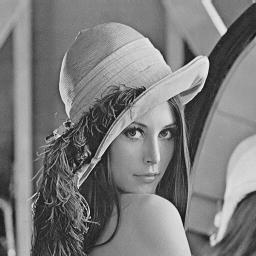

In [2]:
img = cv2.imread('/content/drive/MyDrive/ColabIP/images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
cv2_imshow(gimg)

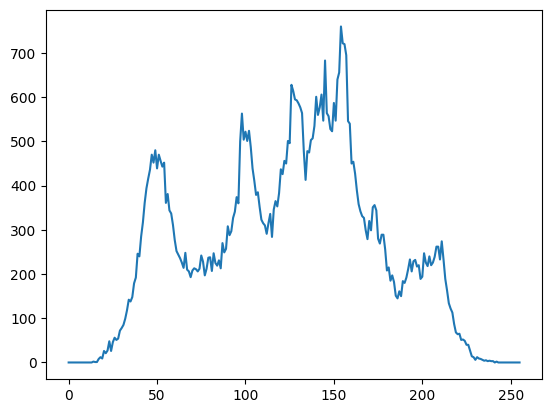

In [3]:
hist = cv2.calcHist([gimg], [0], None, [256], [0, 256])
plt.plot(hist)

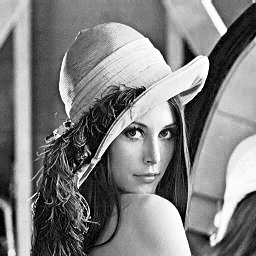

In [4]:
gOut = cv2.equalizeHist(gimg)
cv2_imshow(gOut)

(256, 1)


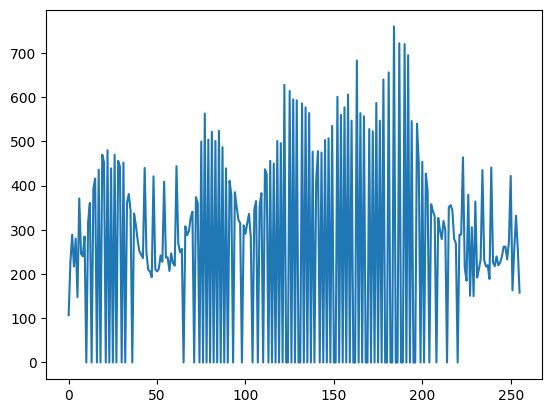

In [6]:
hist = cv2.calcHist([gOut], [0], None, [256], [0, 256])
plt.plot(hist)
print(hist.shape)

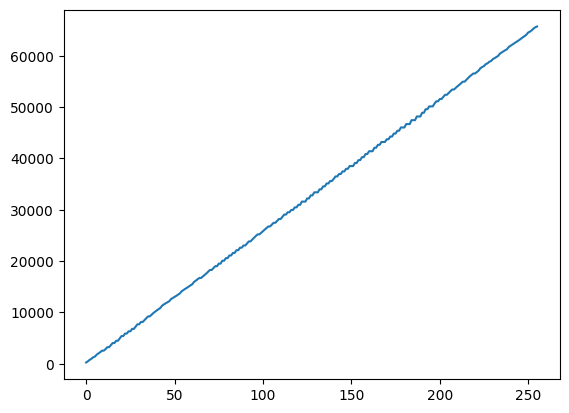

In [7]:
cumulHist = hist.copy()

for i in range(256):
  cumulHist[i] = cumulHist[i-1] + cumulHist[i]

plt.plot(cumulHist)


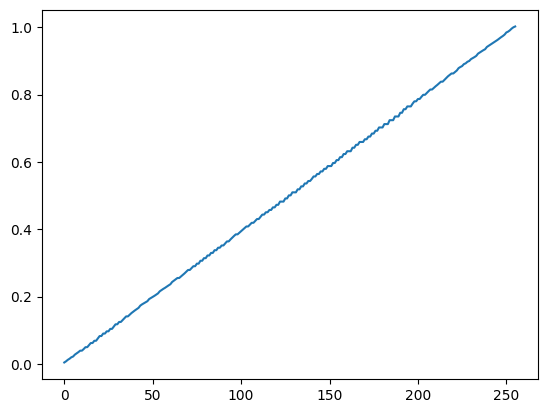

In [8]:
equalHist = cumulHist.copy()
numOfPixels = np.int32(gimg.shape[0]*gimg.shape[1])
equalHist = equalHist/numOfPixels

plt.plot(equalHist)